## Setting up the custom dataset (Dash)

In [ ]:
# Install SNNTorch package
!pip install snntorch

# Import necessary libraries
import snntorch as snn
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

# Training Parameters
batch_size = 128  # Batch size for training
num_classes = 1   # Number of classes (in this case, 1 for dash)

# Define custom dash image creation function
def create_dash_image(size):
    """Creates a tensor representing a horizontal line image."""
    # Create an empty square tensor (a multi-dimensional array) called image filled with zeros (pixel value)
    image = torch.zeros(size, size)
    # Draw a horizontal dash in the middle of the image
    image[size // 2, :] = 1.0  # Set entire row to 1.0
    return image.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions (2D to a 4D shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

## RASTER PLOTS for Latency Coding

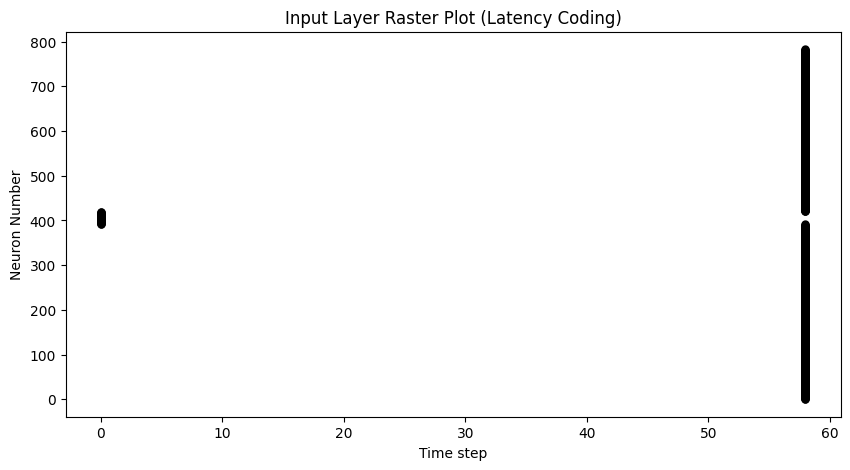

In [ ]:
import torch
import matplotlib.pyplot as plt
from snntorch import spikegen, spikeplot as splt

# Custom Dash Dataset with clear variable naming and comments
class CustomDashDataset(torch.utils.data.Dataset):
    def __init__(self, size=28):
        """Initialize the CustomDashDataset."""
        self.size = size
        self.data = create_dash_image(size)  # Assuming create_dash_image function exists

    def __len__(self):
        """Return the length of the dataset."""
        return 1  # We only have one image (the dash)

    def __getitem__(self, idx):
        """Get an item from the dataset."""
        return self.data.clone()  # Return data and target as a tuple

def convert_to_time(data, tau=5, threshold=0.01):
    """Converts data to spike times using latency coding.

    Args:
        data: A tensor of input data.
        tau: Time constant for latency coding.
        threshold: Threshold for spike generation.

    Returns:
        A tensor of spike times.
    """
    spike_time = tau * torch.log(data / (data - threshold))
    return spike_time

tau=5
threshold=0.01

# Fetch data and target using clear variable names
custom_dataset = CustomDashDataset(size=28)
dash_image = custom_dataset[0]  # Get the first image

# Convert the dash image to spike times using latency coding
spike_times = convert_to_time(dash_image.unsqueeze(0), tau, threshold)

# Generate spike data for the entire dataset
spike_data = spikegen.latency(custom_dataset.data.unsqueeze(1), num_steps=100, tau=tau, threshold=threshold)

# Raster plot for the input layer
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(100, -1), ax, s=25, c="black")

plt.title("Input Layer Raster Plot (Latency Coding)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()